# New(ish) Python Data Tools

Jake VanderPlas, Dec 1st 2015

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## Seaborn

https://stanford.edu/~mwaskom/software/seaborn

/Users/jakevdp/anaconda/envs/python3.4/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


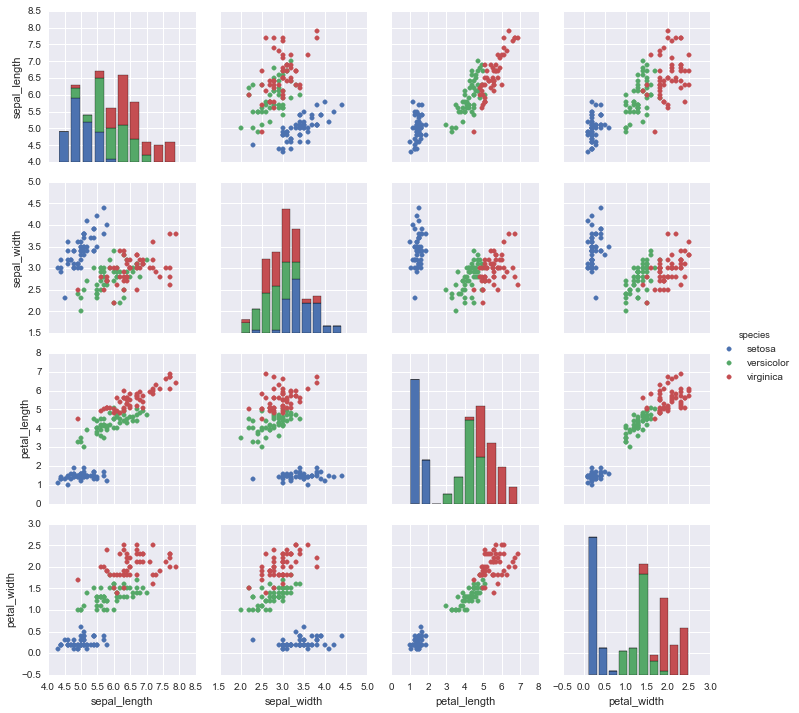

In [2]:
import seaborn as sns
iris = sns.load_dataset('iris')
output = sns.pairplot(iris, hue='species');

## Bokeh

http://bokeh.pydata.org


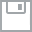
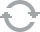
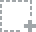
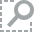
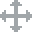
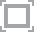
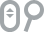
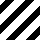
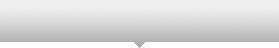
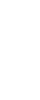
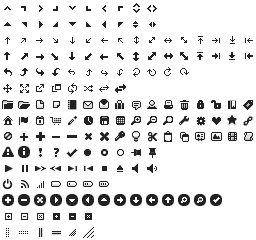
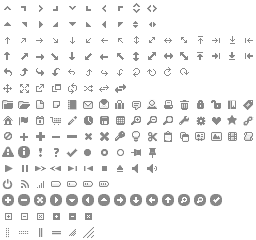
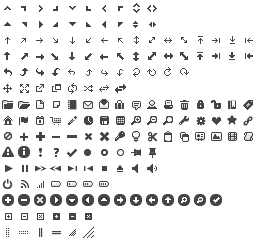
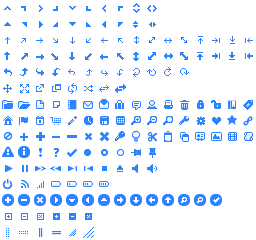
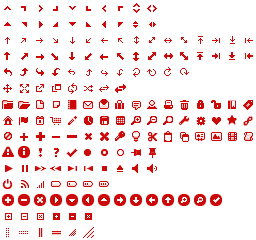
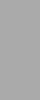
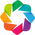
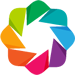

In [3]:
from bokeh.io import output_notebook
output_notebook()

In [4]:
from bokeh.plotting import figure, show

N = 4000

x = np.random.random(size=N) * 100
y = np.random.random(size=N) * 100
radii = np.random.random(size=N) * 1.5
colors = ["#%02x%02x%02x" % (r, g, 150)
          for r, g in zip(np.floor(50+2*x), np.floor(30+2*y))]

TOOLS = ("resize,crosshair,pan,wheel_zoom,box_zoom,reset,tap,"
         "previewsave,box_select,poly_select,lasso_select")

p = figure(tools=TOOLS)
p.scatter(x, y, radius=radii, fill_color=colors, fill_alpha=0.6, line_color=None)
show(p)

/Users/jakevdp/anaconda/envs/python3.4/lib/python3.4/site-packages/IPython/kernel/__main__.py:9: DeprecationWarning: automatic int conversions have been deprecated


## Conda

http://conda.pydata.org/

No more Python stack installation headaches!

```
$ conda install numpy scipy matplotlib
```

Completely compartmentalized computing environments!

```
$ conda create -n my_env python=3.5
```

```
$ source activate my_env
```

```
$ conda env list
```

## Numba

http://numba.pydata.org

In [5]:
import numpy as np

In [6]:
def sum2d(arr):
    M, N = arr.shape
    result = 0.0
    for i in range(M):
        for j in range(N):
            result += arr[i,j]
    return result

In [7]:
arr = np.random.random((1000, 1000))
%timeit sum2d(arr)

1 loops, best of 3: 258 ms per loop


In [8]:
%timeit arr.sum()

1000 loops, best of 3: 583 µs per loop


In [9]:
import numba

@numba.jit
def sum2d_fast(arr):
    M, N = arr.shape
    result = 0.0
    for i in range(M):
        for j in range(N):
            result += arr[i,j]
    return result

sum2d_fast(np.random.rand(2, 2))

2.0006559987301715

In [10]:
sum2d_fast

CPUOverloaded(<function sum2d_fast at 0x10c8a9510>)

In [11]:
%timeit sum2d_fast(arr)

1000 loops, best of 3: 922 µs per loop


## Dask

http://dask.pydata.org

In [12]:
# create an array of normally-distributed random numbers
a = np.random.randn(1000)

# multiply this array by a factor
b = a * 4

# find the minimum value
b_min = b.min()
print(b_min)

-11.6083275833


In [13]:
import dask.array as da

# create a dask array from the above array
a2 = da.from_array(a, chunks=200)

# multiply this array by a factor
b2 = a2 * 4

# find the minimum value
b2_min = b2.min()
print(b2_min)

dask.array<atop-0c..., shape=(), dtype=float64, chunksize=()>


In [14]:
#!pip install graphviz

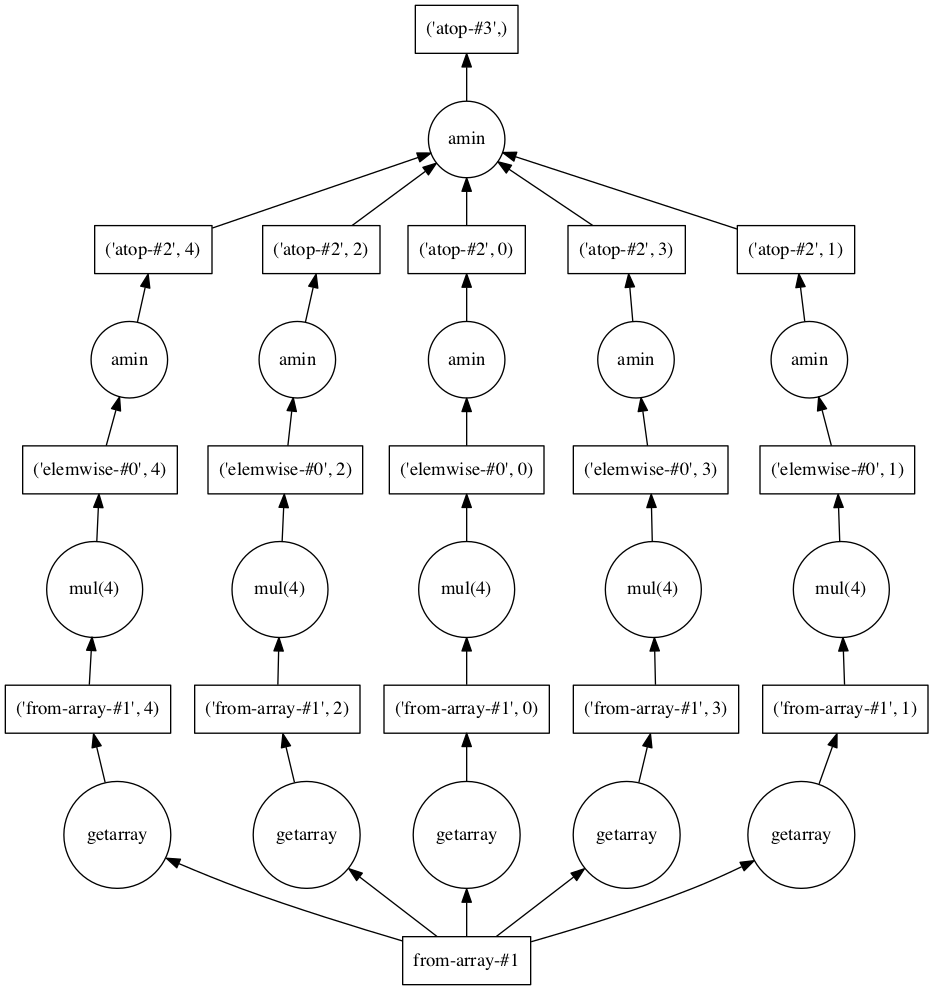

In [15]:
from dask.dot import dot_graph
dot_graph(b2_min.dask)

In [16]:
b2_min.compute()

-11.608327583269398

In [17]:
b.min()

-11.608327583269398

## XRay

http://xray.readthedocs.org

In [18]:
import numpy as np
data = np.random.rand(2, 3)
data

array([[ 0.57963012,  0.94792312,  0.54614975],
       [ 0.02681724,  0.71847708,  0.49552017]])

In [19]:
mean = data.mean(1)
data - mean[:, None]

array([[-0.11160421,  0.25668879, -0.14508458],
       [-0.38678759,  0.30487225,  0.08191534]])

In [20]:
import xray
xray.DataArray(data)

<xray.DataArray (dim_0: 2, dim_1: 3)>
array([[ 0.57963012,  0.94792312,  0.54614975],
       [ 0.02681724,  0.71847708,  0.49552017]])
Coordinates:
  * dim_0    (dim_0) int64 0 1
  * dim_1    (dim_1) int64 0 1 2

In [21]:
xdata = xray.DataArray(data,
                      [('x', ['a', 'b']), ('y', [-2, 0, 2])])
xdata

<xray.DataArray (x: 2, y: 3)>
array([[ 0.57963012,  0.94792312,  0.54614975],
       [ 0.02681724,  0.71847708,  0.49552017]])
Coordinates:
  * x        (x) <U1 'a' 'b'
  * y        (y) int64 -2 0 2

In [22]:
ymean = xdata.mean('y')
xdata - ymean

<xray.DataArray (x: 2, y: 3)>
array([[-0.11160421,  0.25668879, -0.14508458],
       [-0.38678759,  0.30487225,  0.08191534]])
Coordinates:
  * x        (x) <U1 'a' 'b'
  * y        (y) int64 -2 0 2

Also... built-in integration with Dask! See http://xray.readthedocs.org/en/stable/dask.html